# Google Data Analytics Certificate Capstone Project Using Python


### Case Study 2: Bellabeat, How Can a Wellness Technology Company Play It Smart? 


 Bellabeat, a high-tech company that manufactures health-focused smart products wants to analyse the usage of one of their products in order to gain insight into how people are already using their smart devices.Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

### Chapter I: Ask
**Objectives**  

**Identifying the business task:**
* Identify trends in Bellabeat's customer's smart device usage to make marketing recommendations based on customer's needs.  

**Considering key stakeholders:**  
* Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer; 
* Sando Mur, Mathematician and Bellabeat’s cofounder; 
* The rest of the Bellabeat marketing analytics team.


**Business Questions:**
* What are some trends in smart device usage? 
* How could these trends apply to Bellabeat customers? 
* How could these trends help influence Bellabeat marketing strategy?


### Chapter II: Prepare
**Objectives**  
 
**Credibility of the data**

The data is public data from FitBit Fitness Tracker Data. It's a dataset from thirty fitbit users that includes minute-level output for physical activity, heart rate, and sleep monitoring. It's a good database segmented in several tables with different aspects of the data of the device with lots of details about the user behaviour.

**Sorting and filtering the data**  

For this analysis I'm going to focus on the daily timeframe as my analysis is focused on detecting high-level trends in usage, not in the detailed performance of the users. For that the most interesting data for me is all the daily activity and the sleep data as they will probably show some interesting patterns but I'll have to merge some tables together to do my analysis.

**Examining daily data:**  

Through examining the "daily" .csv's provided from within the FitBit Fitness Tracker Data, it was determined that the "dailyActivity_merged.csv" file, is the daily steps, intensities and calories merged into one dataset. 

In [91]:
import pandas as pd
import statistics as stats
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [92]:
#Importing data
dailyActivity_df = pd.read_csv ('Fitabase-Data//dailyActivity_merged.csv')
dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [93]:
sleepDay_df = pd.read_csv ('Fitabase-Data//sleepDay_merged.csv')
sleepDay_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [94]:
# Merge sleep activity into daily activity.
dailyData_df = pd.merge(
    sleepDay_df, 
    dailyActivity_df,  
    how='inner', 
    on=['Id']
)
dailyData_df.head()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [95]:
# Summary statistics.
dailyData_df.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1.244100e+04,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000,12441.000000
mean,5.027013e+09,1.120730,419.405996,458.360502,8117.309220,5.734738,5.727768,0.123330,1.398613,0.732190,3.541771,0.000674,23.973555,17.352222,199.907081,799.194759,2329.143156
std,2.047809e+09,0.348015,118.643717,127.506066,4478.635437,3.243540,3.235954,0.553071,1.912730,1.037477,1.878553,0.007813,34.911291,23.020340,97.241286,266.778654,762.027131
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,402.000000,4660.000000,3.180000,3.180000,0.000000,0.000000,0.000000,2.370000,0.000000,0.000000,0.000000,144.000000,659.000000,1783.000000
50%,4.702922e+09,1.000000,432.000000,463.000000,8596.000000,6.120000,6.120000,0.000000,0.530000,0.400000,3.540000,0.000000,8.000000,10.000000,200.000000,734.000000,2162.000000
75%,6.962181e+09,1.000000,492.000000,526.000000,11317.000000,7.920000,7.890000,0.000000,2.310000,1.000000,4.830000,0.000000,36.000000,24.000000,258.000000,853.000000,2865.000000
max,8.792010e+09,3.000000,796.000000,961.000000,22988.000000,17.950001,17.950001,4.942142,13.400000,6.480000,10.300000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


### Chapter III & IV: Process and Analyse

Let's examine how activity level impacts calories burnt and sleep quality.

Firstly, let's group users by their activity level.

We'll say that users that perform more daily minutes in an activity level than the mean (number of daily minutes performed in that activity level) are classified as that activity level, starting with 'VeryActiveMinutes':

In [96]:
# Define each activity level:
dailyData_df['activityLevel'] = \
    np.where(
        (dailyData_df['VeryActiveMinutes'] > stats.mean(dailyData_df['VeryActiveMinutes'])),
        'Very Active', 
    np.where(
        (dailyData_df['FairlyActiveMinutes'] > stats.mean(dailyData_df['FairlyActiveMinutes'])),
        'Fairly Active', 
    np.where(
        (dailyData_df['LightlyActiveMinutes'] > stats.mean(dailyData_df['LightlyActiveMinutes'])),
        'Lightly Active', 
        'Sedentary', #else
    )))

<function matplotlib.pyplot.show(close=None, block=None)>

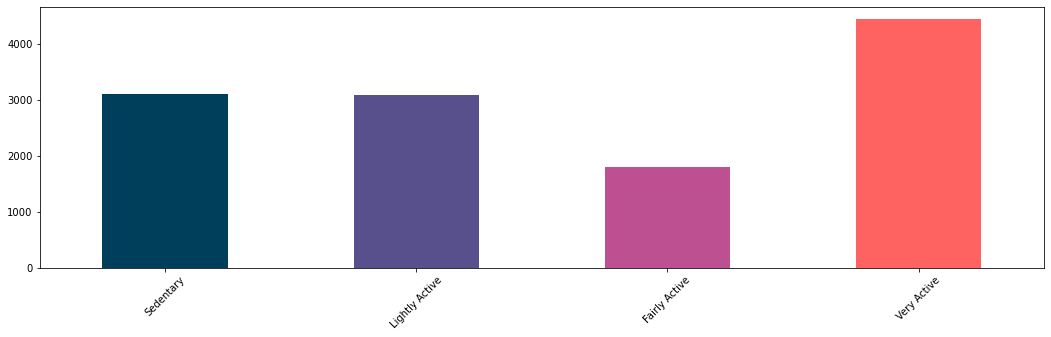

In [97]:
#Display how many people are in each Category:
activityLevel_counts_df = dailyData_df['activityLevel'].value_counts() 

activityLevel_counts_df\
    .reindex(["Sedentary", "Lightly Active", "Fairly Active", "Very Active"])\
    .plot\
    .bar(color=['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'], figsize=(18, 4.8)) 

plt.xticks(rotation=45)
plt.show

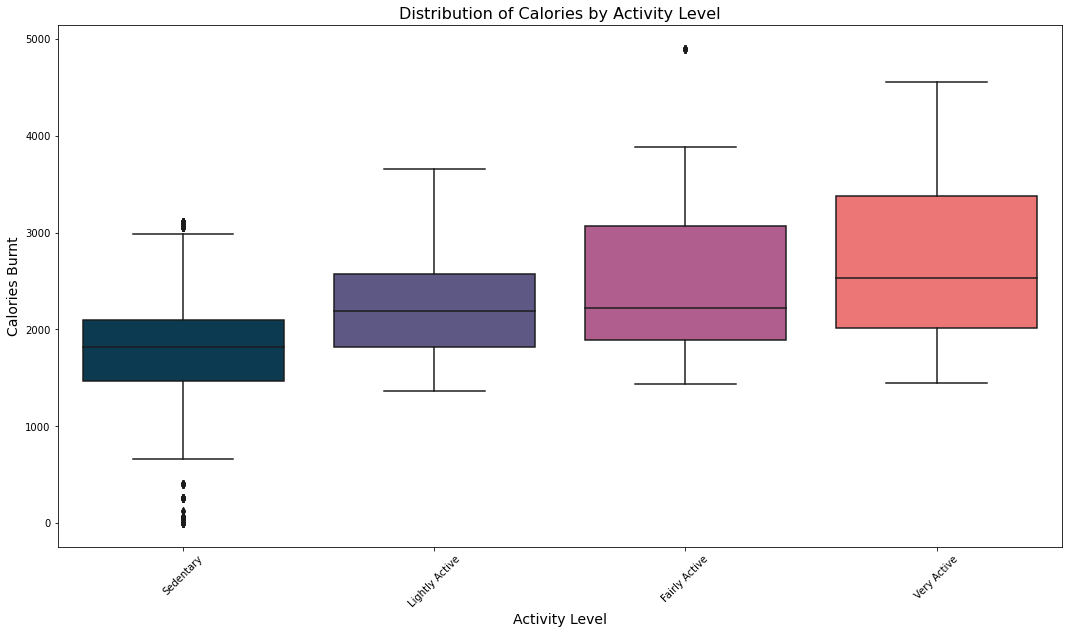

In [98]:
#Now let's create a boxplot showing the distribution of calories burnt in each activity level:

colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
plt.figure(figsize=(18, 9.6))
boxplot = sns.boxplot(
    x=dailyData_df['activityLevel'], 
    y=dailyData_df['Calories'], 
    palette=colors,
    order=["Sedentary", "Lightly Active", "Fairly Active", "Very Active"]
)

boxplot.axes.set_title("Distribution of Calories by Activity Level", fontsize=16)
boxplot.set_xlabel("Activity Level", fontsize=14)
boxplot.set_ylabel("Calories Burnt", fontsize=14)

plt.xticks(rotation=45)
plt.show()


Key takeaways from these plots:
* Very active people make up most of Bellabeat's users. 
* There is a strong linear trend between a user's activity level and the number of calories they burn. 
* Very active users burnt 47% more calories then users that were sedentary.  

Next, let's investigate how activity level affects sleep quality:

In [99]:
# Firstly, we'll say that people that sleep more than 8 hours a day are over sleepers, people who sleep 
# less than 6 hours a day are under sleepers, and anyone in between is well slept.

dailyData_df['sleepQuality'] = \
    np.where(
        (dailyData_df['TotalMinutesAsleep'] >= 480),
        'Over-slept', 
    np.where(
        ( (dailyData_df['TotalMinutesAsleep'] >= 360) & (dailyData_df['TotalMinutesAsleep'] < 480) ),
        'Well-slept', 

        'Under-slept'
        ))

dailyData_df['sleepQuality'].value_counts()

Well-slept     5846
Over-slept     3550
Under-slept    3045
Name: sleepQuality, dtype: int64

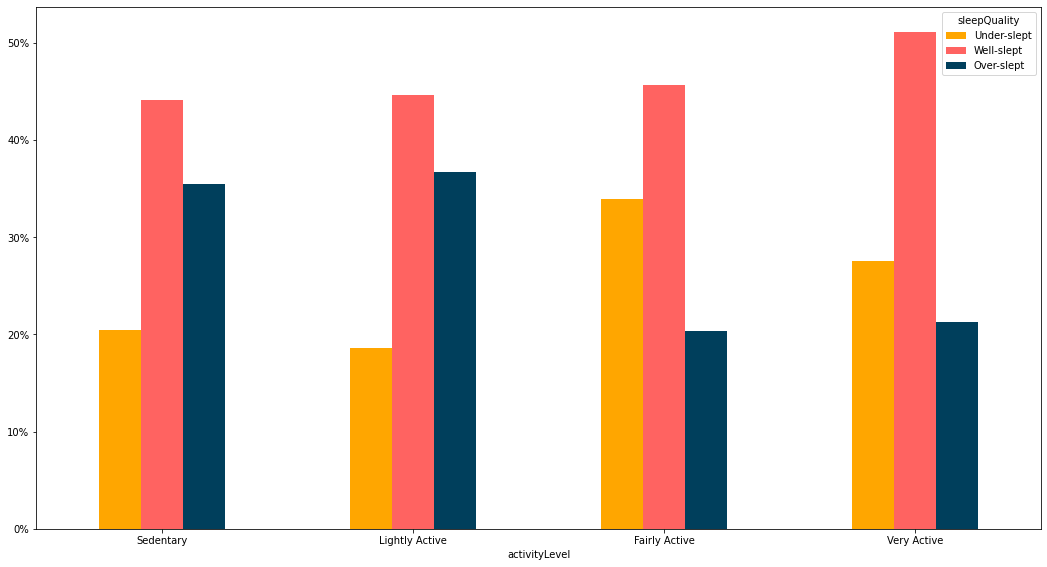

In [100]:
# Next, we'll group users by activity level and then count the number of occurences in each sleep quality category.
# We'll then plot this data on a bar graph.

dailyData_df.groupby('activityLevel') \
    .sleepQuality.value_counts(normalize=True) \
    .unstack(0) \
    .transpose() \
    .reindex(["Sedentary", "Lightly Active", "Fairly Active", "Very Active"]) \
    .reindex(columns=['Under-slept', 'Well-slept', 'Over-slept']) \
    .plot(kind="bar", figsize=(18, 9.6), rot=0, color=['#ffa600', '#ff6361', '#003f5c', '#58508d', '#bc5090']) \
    .yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

This plot is great as shows some key trends really clearly:
* You are 7% more likely to be well-slept if you are a very active person.
* People who are sedentary or lightly active are more than 15% more likely to oversleep than people or are fairly or very active.
* Active people do not hang around in bed very long! They were 11% more likely to undersleep.

### Chapter V: Share

**Key objectives:** Share my conclusions.

**Key insights that could be used to improve Bellabeat's marketing:**

1. Most of Bellabeat's customers are very active users.  

    **Suggestions**:  
    * This could suggest a gap in the market for targeting less active people.
    * Or more importantly, it could show that Bellabeat's devices are indeed encouraging their wearers to be more active.      
<br>
2. The more active a user is the more calories they burn. Particularly if they are a very active User.  

    **Suggestions**:
    * Logging this activity with Bellabeat's devices could be a good motivator to increase your activity if you are aiming to lose weight.  
<br>
3. More activity was generally linked to an improved quality of sleep.

    **Suggestions:**  
    * This could provide opportunities to market the products as stress lowering, and overall quality of life improving products.




    


## Thanks for taking the time to read this! I hope it was insightful.

This notebook was influenced by JULEN ARANGUREN's notebook:  
https://www.kaggle.com/code/julenaranguren/bellabeat-case-study/notebook